In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.linalg import inv
import seaborn as sns

In [10]:
a = np.array([1, 1, 1])
type(a)

numpy.ndarray

In [170]:
class LinearRegressor(object):
    def __init__(self, **kwargs):
        self.normalize = kwargs.get('normilize', False)
        self.log = kwargs.get('log', False)
        self.draw_plot = kwargs.get('draw_plot', False)
        
    def count_MSE(self, a, b):
        if a.shape != b.shape:
            return
        n = len(a)
        res = 0
        for i in range(n):
            res += 1 / n * ((a[i] - b[i]) ** 2)
        return res
    
    def predict(self, test):
        res = np.dot(test, self.w)
        for i in range(len(res)):
            if res[i] > 0:
                res[i] = 1
            else:
                res[i] = -1
        return res
    
    def fit(self, X, y):
        self.w = np.dot(np.dot(inv(np.dot(np.transpose(X), X)), np.transpose(X)), y)
        if self.log:
            y_pred = self.predict(X)
            print(y_pred)
            MSE = self.count_MSE(y, y_pred)
            print("MSE on train data = {}".format(MSE))
            
        if X.shape[1] == 2:
            print(self.w)
            df = pd.DataFrame({'x': [i[0] for i in X], 'y': [i[1] for i in X], 'class': y})
            print(df)
            sns.set_style('darkgrid')
            sns.scatterplot(data=df, x='x', y='y', hue='class', palette=['black', 'red'])
        

In [171]:
model = LinearRegressor(log=True)

[ 1.  1.  1. -1. -1. -1. -1.]
MSE on train data = 0.0
[-0.43383494  0.70690675]
     x    y  class
0  2.0  2.0      1
1  3.0  3.0      1
2  4.0  4.0      1
3  2.0  1.0     -1
4  0.5  0.3     -1
5  3.0  1.0     -1
6  5.0  1.0     -1


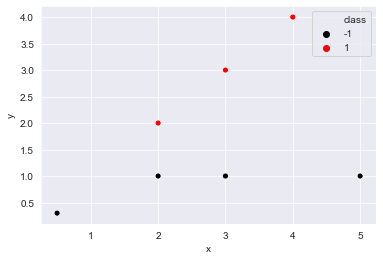

In [172]:
X = np.array([[2, 2], [3, 3], [4, 4], [2, 1], [0.5, 0.3], [3, 1], [5, 1]])
y = np.array([1, 1, 1, -1, -1, -1, -1])
model.fit(X, y)